New day prediction: Yes


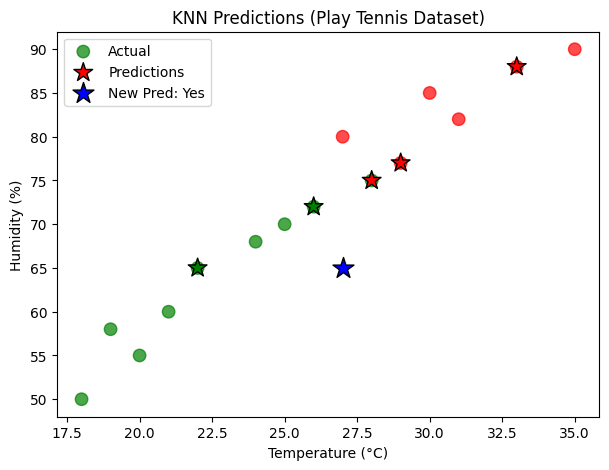

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Dataset
data = {
    'temperature': [22, 25, 27, 30, 35, 28, 21, 20, 18, 33, 31, 29, 24, 26, 19],
    'humidity':    [65, 70, 80, 85, 90, 75, 60, 55, 50, 88, 82, 77, 68, 72, 58],
    'play':        ["Yes","Yes","No","No","No",
                    "Yes","Yes","Yes","Yes","No",
                    "No","No","Yes","Yes","Yes"]
}

df = pd.DataFrame(data)

X = df[['temperature', 'humidity']].values
y = df['play'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions on test data
y_pred = knn.predict(X_test)

# New prediction
new_day = np.array([[27, 65]])  # 27°C and 65% humidity
new_pred = knn.predict(new_day)[0]
print("New day prediction:", new_pred)

# --- Plotting ---
colors = {'Yes': 'green', 'No': 'red'}
plt.figure(figsize=(7,5))

# Actual data points (all at once, with color map)
plt.scatter(df['temperature'], df['humidity'],
            c=df['play'].map(colors), label="Actual", s=80, alpha=0.7)

# Test predictions as stars
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=[colors[p] for p in y_pred], marker='*', s=200, edgecolor='k', label="Predictions")


# New prediction as BLUE star
plt.scatter(new_day[0,0], new_day[0,1], c='blue', marker='*', s=250, edgecolor='k', label=f"New Pred: {new_pred}")

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("KNN Predictions (Play Tennis Dataset)")
plt.legend()
plt.show()


In [31]:
acc = accuracy_score(y_test, y_pred)
print("Predictions:", y_pred)
print("Actual     :", y_test)
print("Accuracy   :", acc)

Predictions: ['No' 'No' 'Yes' 'Yes' 'No']
Actual     : ['No' 'No' 'Yes' 'Yes' 'Yes']
Accuracy   : 0.8
